In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
sns.set_theme(style="darkgrid")
import datetime
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import holidays
from tslearn.metrics import dtw
from sklearn.preprocessing import MinMaxScaler

In [10]:
df_store = pd.read_pickle("data/df_daily.pkl")
df_company = df_store.groupby("date").sum()[["sales"]]

In [23]:
store_count = df_store['store_id'].unique().shape[0]
ts_len = df_company.shape[0]
ts = np.empty((store_count, ts_len, 1))

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.05666309],
       [0.02750086],
       [0.15855121]])

In [64]:
store_count = df_store['store_id'].unique().shape[0]
ts_len = df_company.shape[0]
ts = np.empty((store_count, ts_len, 1))
for i in range(store_count):
    store_id=df_store['store_id'].unique()[i]
    store_id_data = pd.DataFrame(
        pd.concat(
            [df_company,
            df_store[df_store['store_id']==store_id].groupby("date").sum()[["sales"]]],
            axis=1,
            join='outer',
        ).iloc[:,1].fillna(0)
    )
    scaler = MinMaxScaler()
    store_id_data=scaler.fit_transform(store_id_data) 
    ts[i] = store_id_data

In [65]:
from tslearn.clustering import TimeSeriesKMeans
seed=1
# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=3,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(ts)

C:\Users\Admin\anaconda3\envs\DataMining_Lab\lib\site-packages\tslearn\clustering\kmeans.py:16: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  warnings.warn(


Soft-DTW k-means
184.545 --> 245.712 --> 250.650 --> 252.263 --> 253.425 --> 253.791 --> 253.796 --> 253.946 --> 253.957 --> 254.039 --> 254.065 --> 254.127 --> 254.127 --> 254.166 --> 254.157 --> 254.180 --> 254.171 --> 254.192 --> 254.184 --> 254.208 --> 254.200 --> 254.225 --> 254.217 --> 254.241 --> 254.234 --> 254.262 --> 254.247 --> 254.271 --> 254.262 --> 254.278 --> 254.271 --> 254.280 --> 254.273 --> 254.280 --> 254.275 --> 254.279 --> 254.276 --> 254.279 --> 254.276 --> 254.279 --> 254.275 --> 254.278 --> 254.275 --> 254.278 --> 254.274 --> 254.279 --> 254.273 --> 254.282 --> 254.274 --> 254.286 --> 


In [75]:
final_clusters=pd.DataFrame({'store_id': df_store['store_id'].unique(), 'cluster':y_pred})

In [77]:
#final_clusters.to_pickle("results/grouping/store_cluster.pkl")

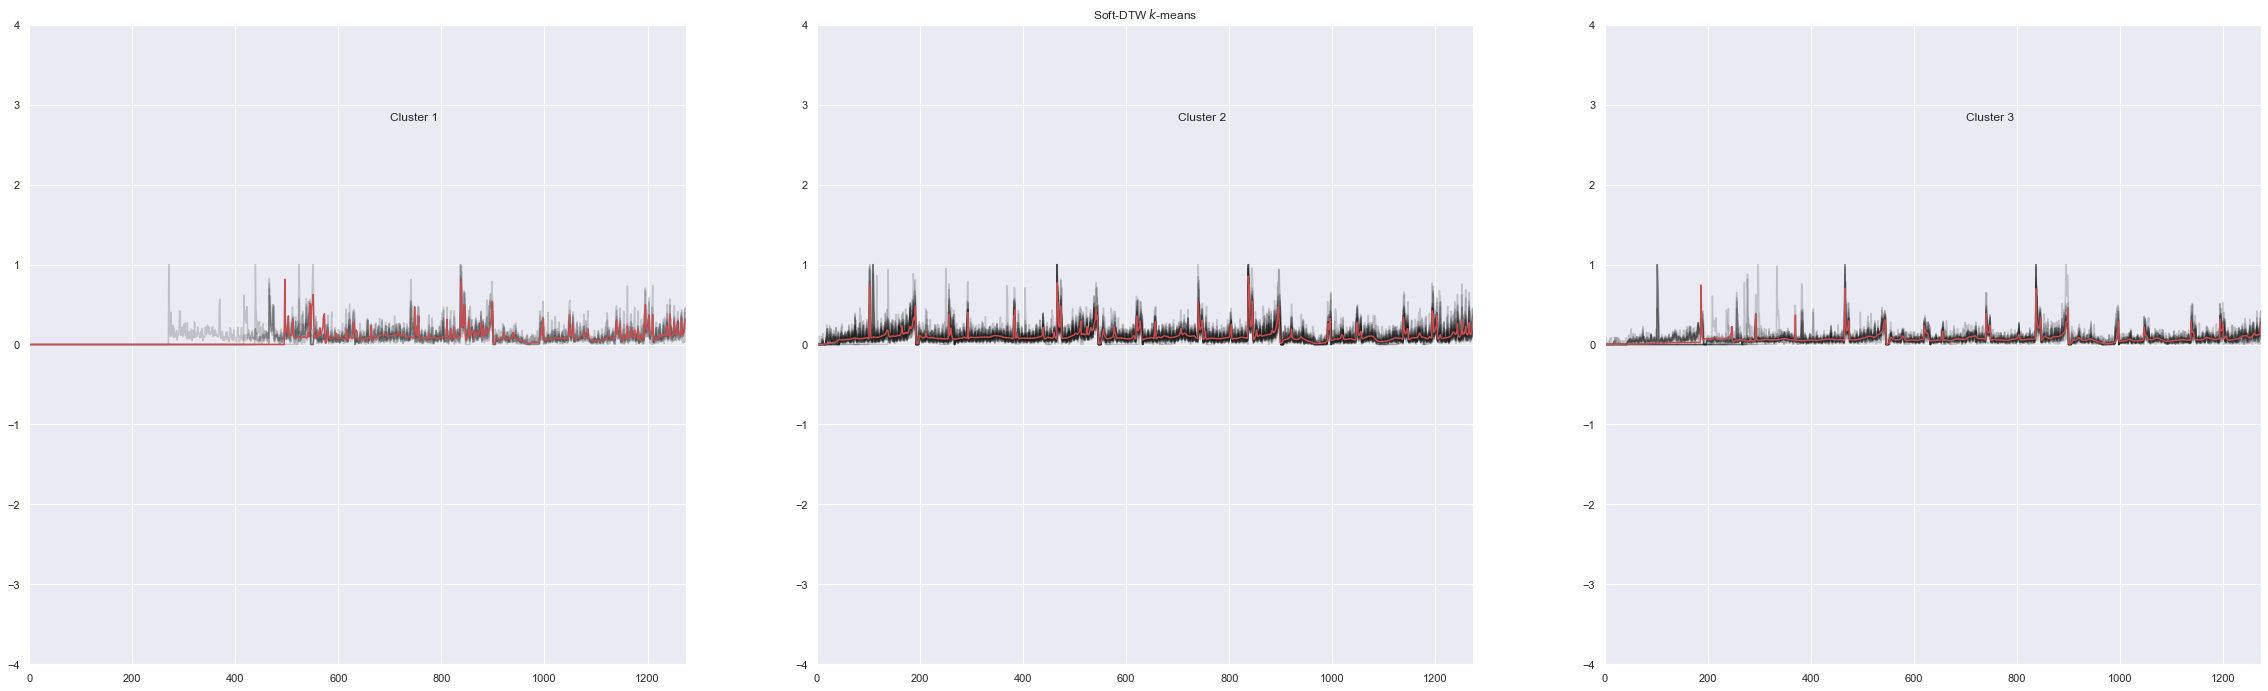

In [85]:
plt.figure(figsize=(40,40))
for yi in range(3):
    plt.subplot(3, 3, 7 + yi)
    for xx in ts[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, ts_len)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")
